# Variable C Solver Examples
***
GillesPy2 contains four C++ solvers, SSACsolver, ODECsolver, TauHybridCSolver, and TauLeapingCSolver, which provide optimization for running multiple simulations of a model with variable parameter values and/or Species initial values.  This is ideal for parameter sweeps, or model exploration.
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [2]:
import numpy as np

In [3]:
import gillespy2

***
## Build the Model
***

In [4]:
def build_hisrd(dt=1.0, end_time=42.0, parameter_values=None):
    # Initialize model                                                                                                                                                                                                      
    model = gillespy2.Model(name="HISRD")

    # Define Variables (GillesPy2.Species)                                                                                                                                                                                             
    healthy = gillespy2.Species(name='healthy', initial_value=10000)
    infected = gillespy2.Species(name='infected', initial_value=1)
    symptomatic = gillespy2.Species(name='symptomatic', initial_value=0)
    dead = gillespy2.Species(name='dead', initial_value=0)
    recovered = gillespy2.Species(name='recovered', initial_value=0)
    
    # Add Variables to Model
    model.add_species([healthy, infected, symptomatic, dead, recovered])

    # Define Parameters                                                                                                                                                                                                                 
    infect = gillespy2.Parameter(name='infect', expression=np.exp(np.log(0.0002)))
    progress = gillespy2.Parameter(name='progress', expression=np.exp(np.log(0.071)))
    recovery = gillespy2.Parameter(name='recovery', expression=np.exp(np.log(0.8)))
    death = gillespy2.Parameter(name='death', expression=np.exp(np.log(0.2)))
    
    # Add Parameters to Model
    model.add_parameter([infect, progress, recovery, death])

    # Define Reactions
    r1 = gillespy2.Reaction(
        name='r1', reactants={'healthy': 1, 'infected': 1 }, products={'infected': 2}, rate='infect'
    )
    r2 = gillespy2.Reaction(
        name='r2', reactants={'healthy': 1, 'symptomatic': 1},
        products={'infected': 1, 'symptomatic': 1}, rate='infect'
    )
    r3 = gillespy2.Reaction(name='r3', reactants={'infected': 1}, products={'symptomatic': 1}, rate='progress')
    r4 = gillespy2.Reaction(name='r4', reactants={'symptomatic': 1}, products={'dead': 1}, rate='death')
    r5 = gillespy2.Reaction(name='r5', reactants={'symptomatic': 1}, products={'recovered': 1}, rate='recovery')
    
    # Add Reactions to Model
    model.add_reaction([r1, r2, r3, r4, r5])

    # Define Timespan
    tspan = gillespy2.TimeSpan.arange(t=end_time, increment=dt)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [5]:
model = build_hisrd()

### Instantiate the Solver
Although this notebook will focus on the SSACSolver, the process remains the same for the ODE and Tau-Leaping solvers. In order to to provide variable parameters, we must first instantiate our model and solver, setting "variable" equal to "True". This will pre-compile the simulation, allowing multiple simulations to run in quick succession.

In [6]:
solverSSAC = gillespy2.SSACSolver(model, variable=True)

***
## Run the Simulations
***
Call model.run with keyword argument variables, ensure "solver" is set to the solver you precompiled in the previous cell
### Variable Species Only
Here, a species initial value is modified over multiple simulations. This will update the value of the `healthy` species for this simulation only.

In [7]:
vs_results = []
def iterate_species():
    for i in range(5, 11):
        vs_results.append(model.run(solver=solverSSAC, timeout=1, variables={'healthy': i * 1000}))
%time iterate_species()

CPU times: user 4.77 ms, sys: 17.2 ms, total: 22 ms
Wall time: 169 ms


### Variable Parameters Only
Here, a parameter value is modified over multiple simulations.  Notice how the method for sweeping over parameters is identical to sweeping over species initial values. This will update the value of the `infect` parameter for this simulation only.

In [8]:
vp_results = []
def iterate_parameter():
    for i in range(1, 6):
        vp_results.append(model.run(solver=solverSSAC, variables={'infect': 0.0001 * i}))
%time iterate_parameter()

CPU times: user 2.6 ms, sys: 10.1 ms, total: 12.7 ms
Wall time: 24.1 ms


### Variable Species and Parameters
Finally, let's sweep over a species and a parameter at the same time. This will update the value of the `healthy` species and the value of the `infect` parameter for this simulation.

In [9]:
vsp_results = []
def iterate_multiple_values():
    for i in range(1, 6):
        vsp_results.append(
            model.run(solver=solverSSAC, variables={'healthy': (i + 4) * 1000, 'infect':0.0001 * i})
        )
%time iterate_multiple_values()

CPU times: user 2.67 ms, sys: 11.6 ms, total: 14.2 ms
Wall time: 21.4 ms


***
## Visualizations
***

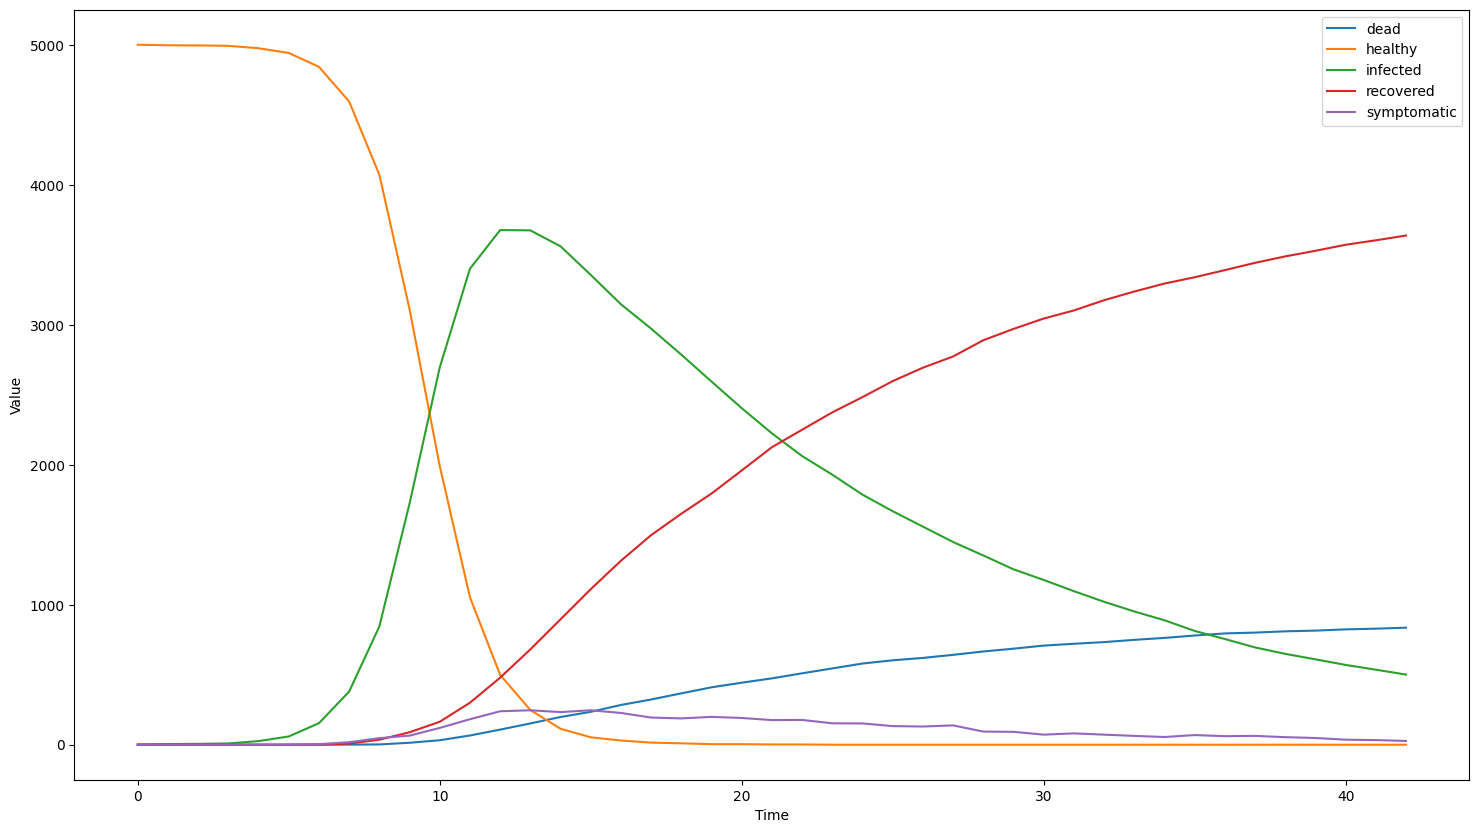

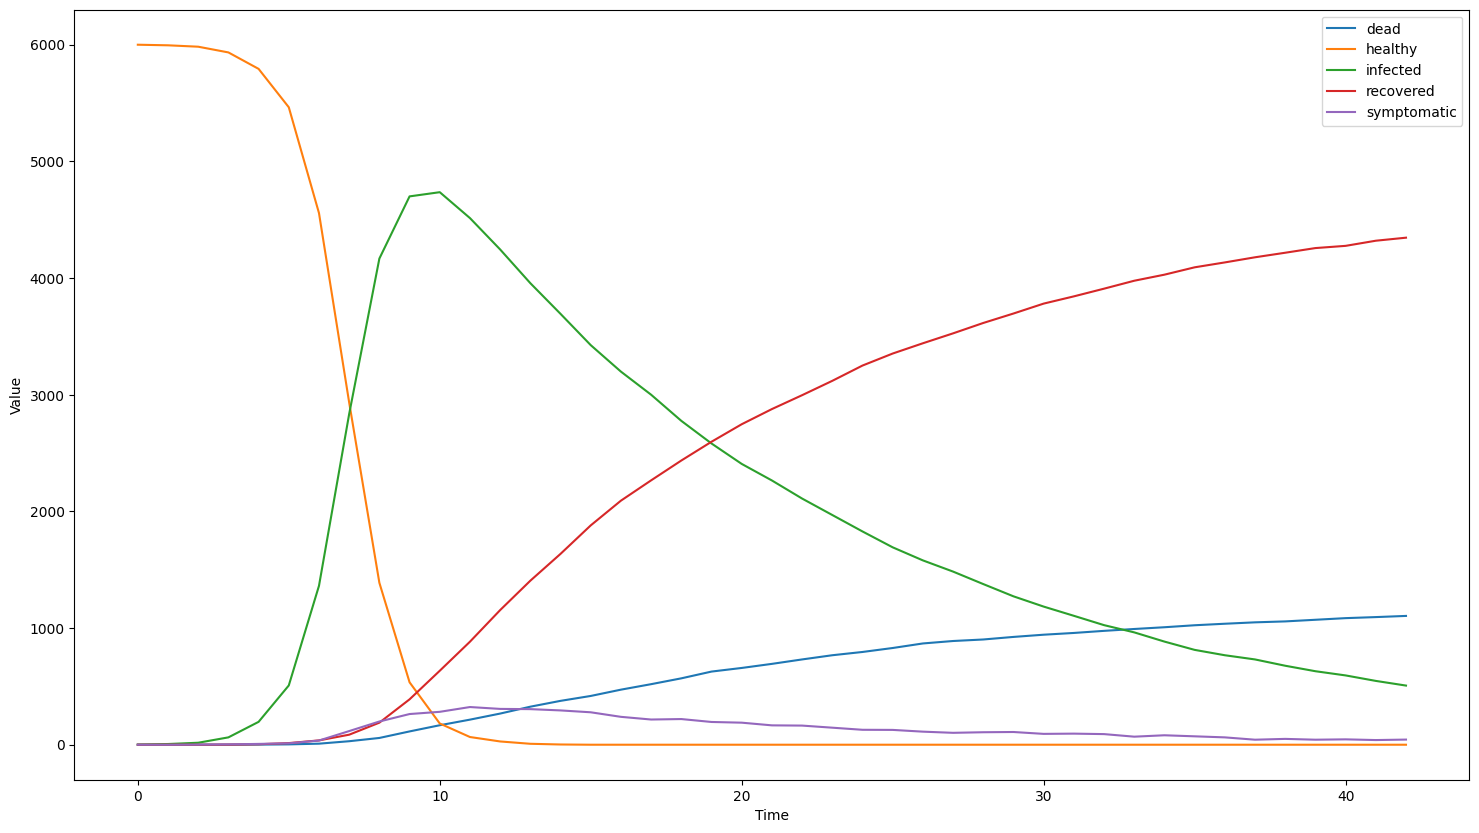

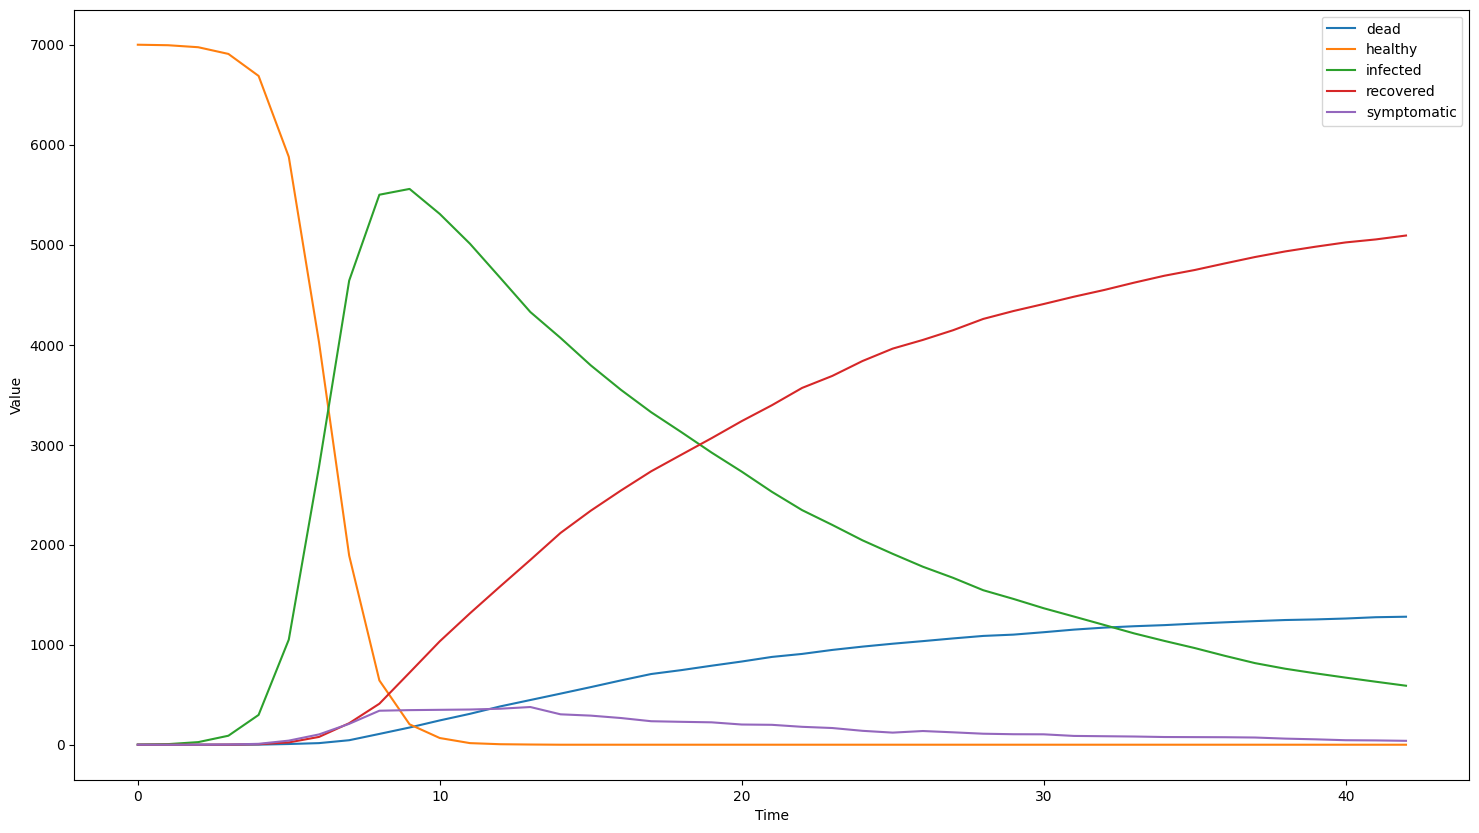

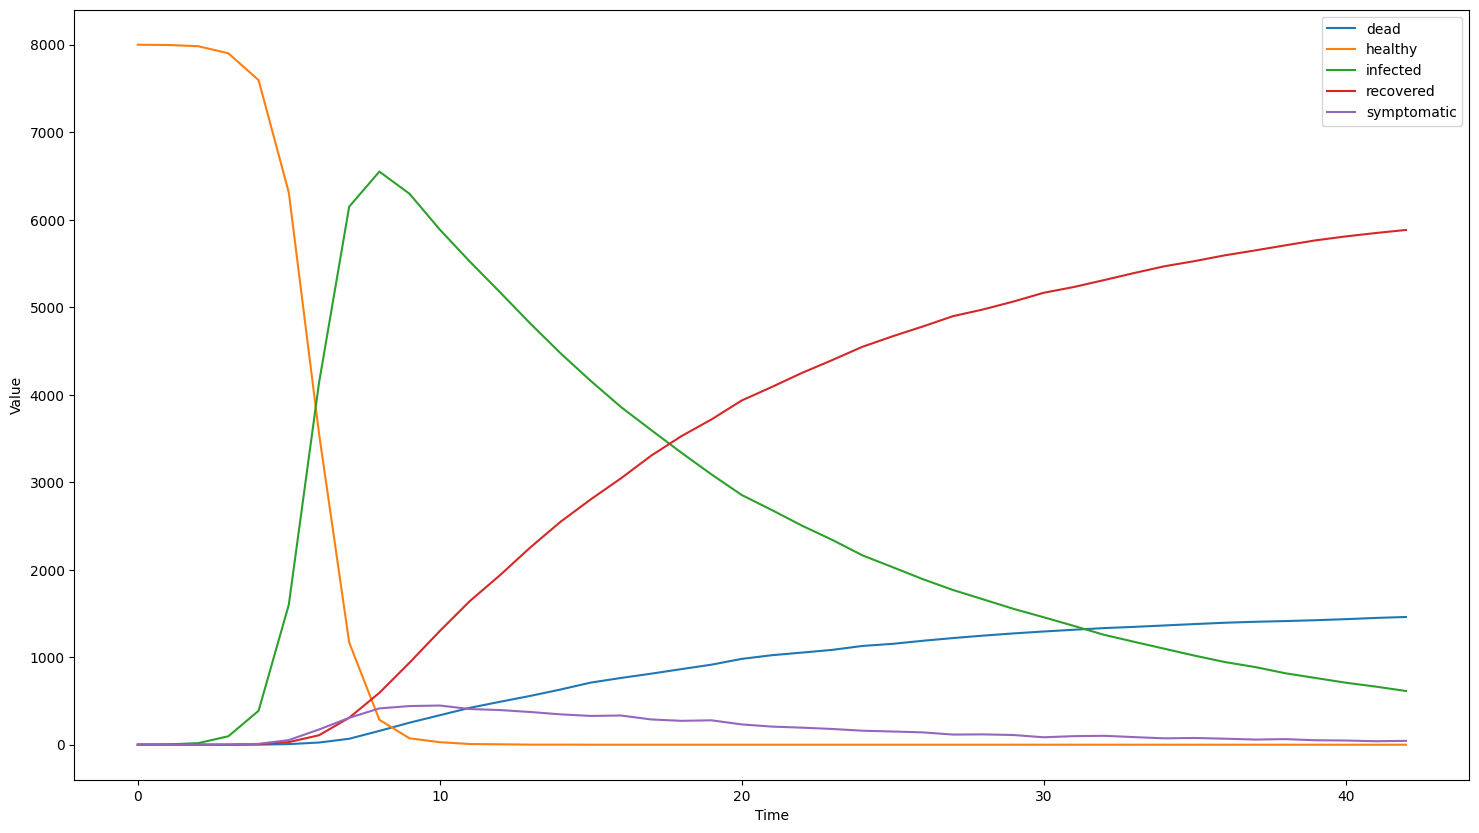

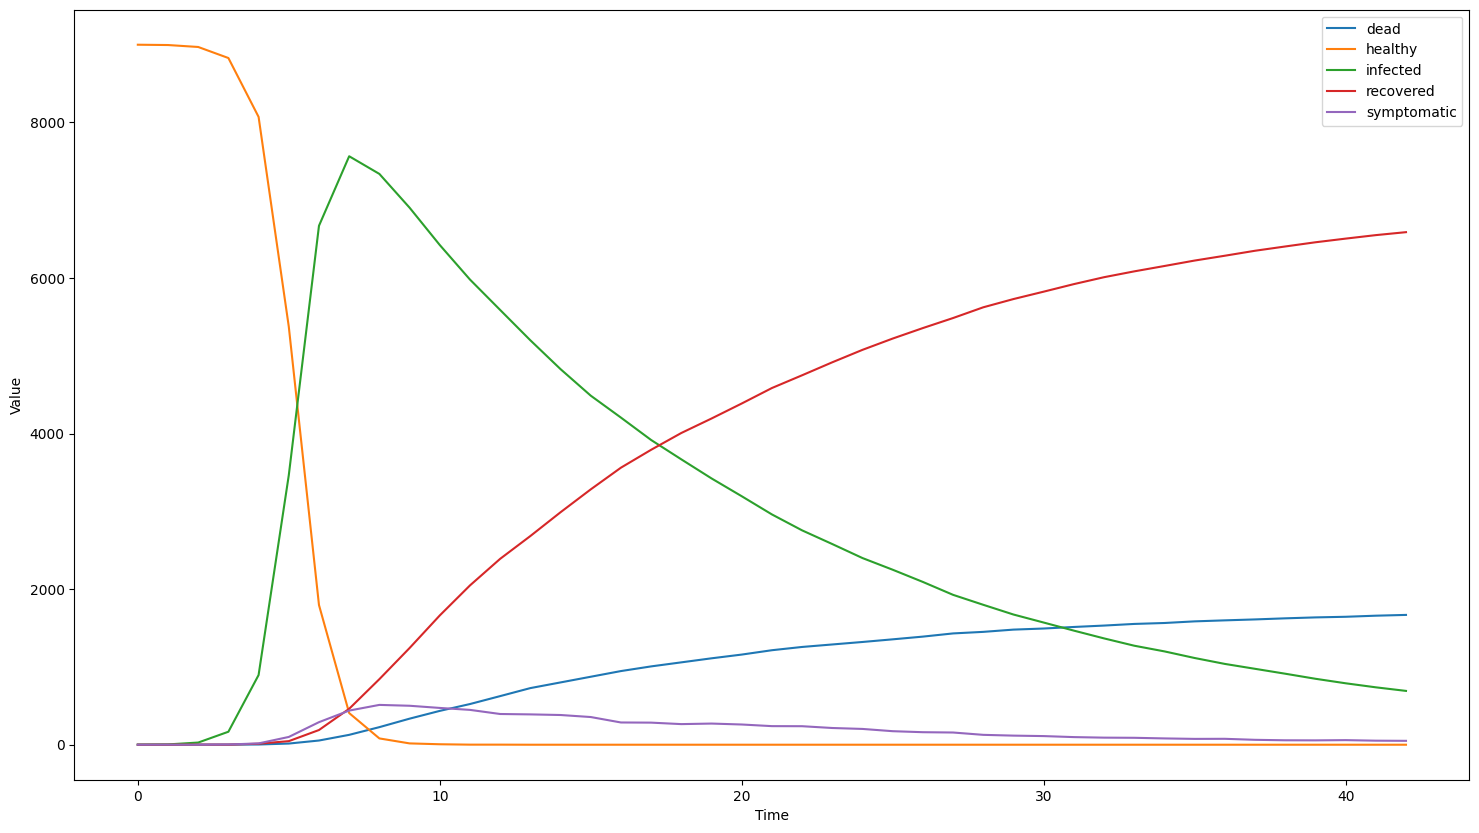

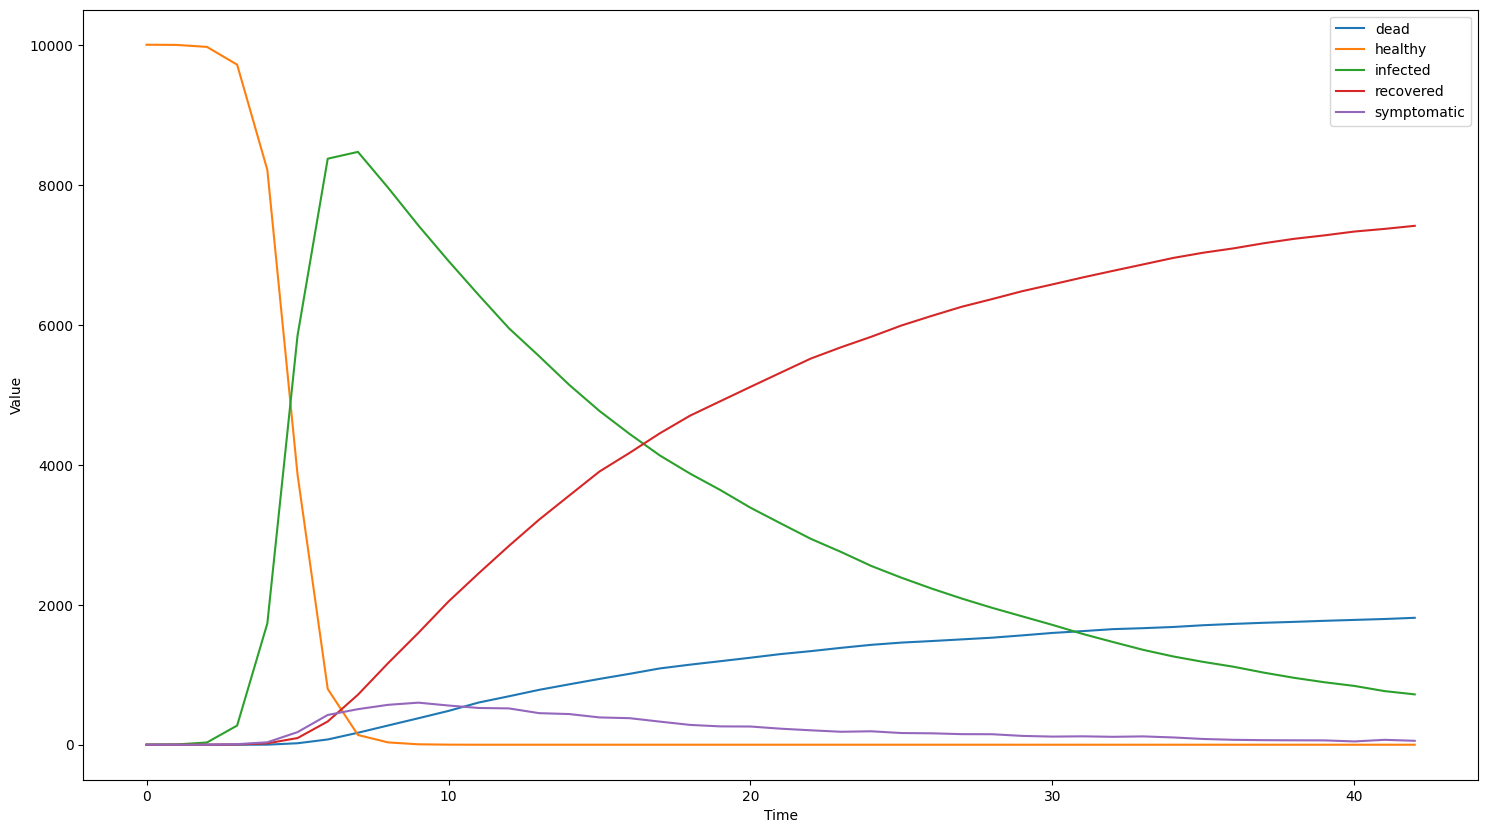

In [10]:
for vs_result in vs_results:
    vs_result.plot()

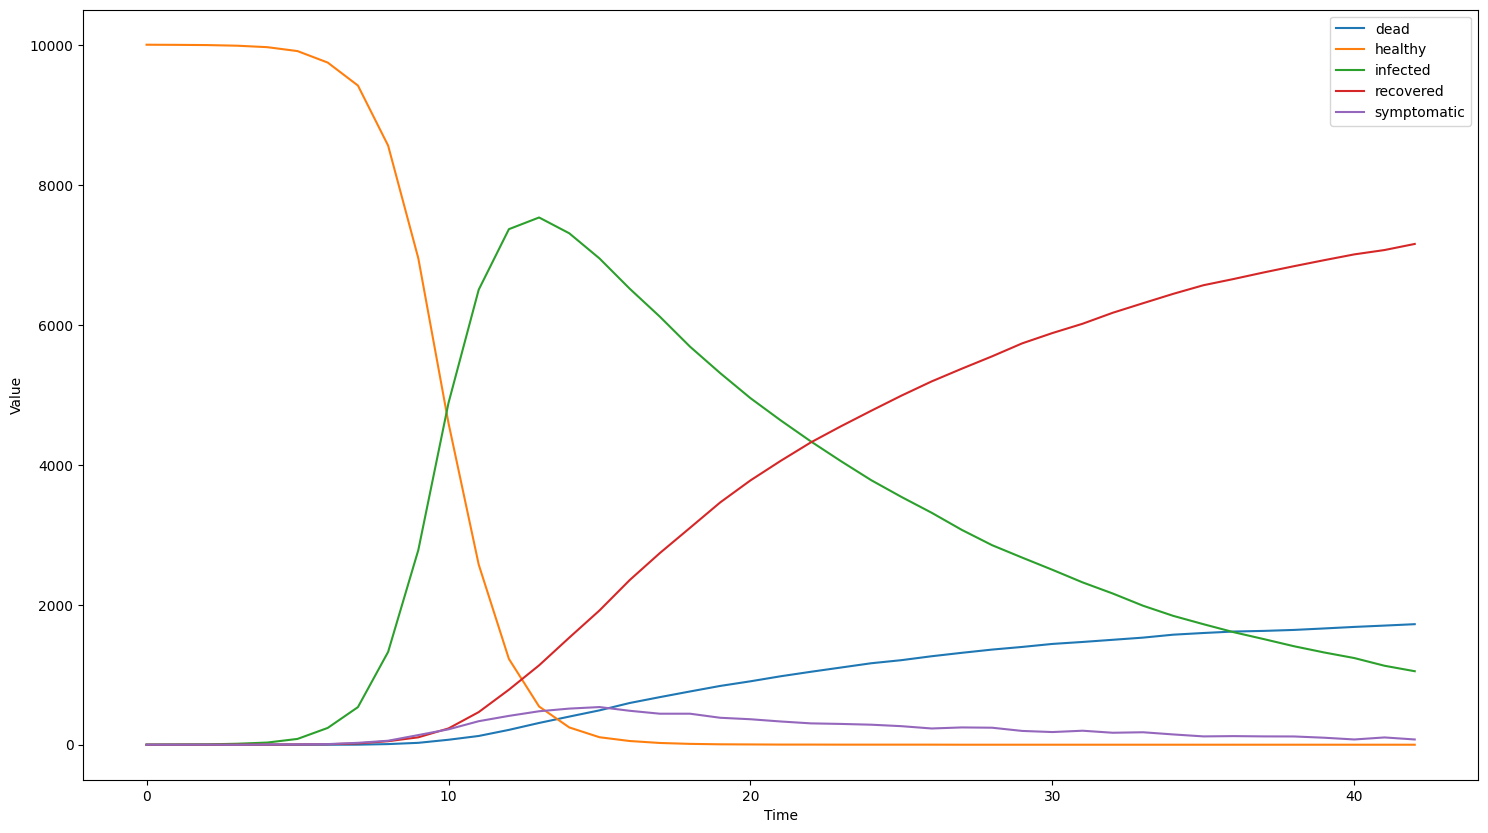

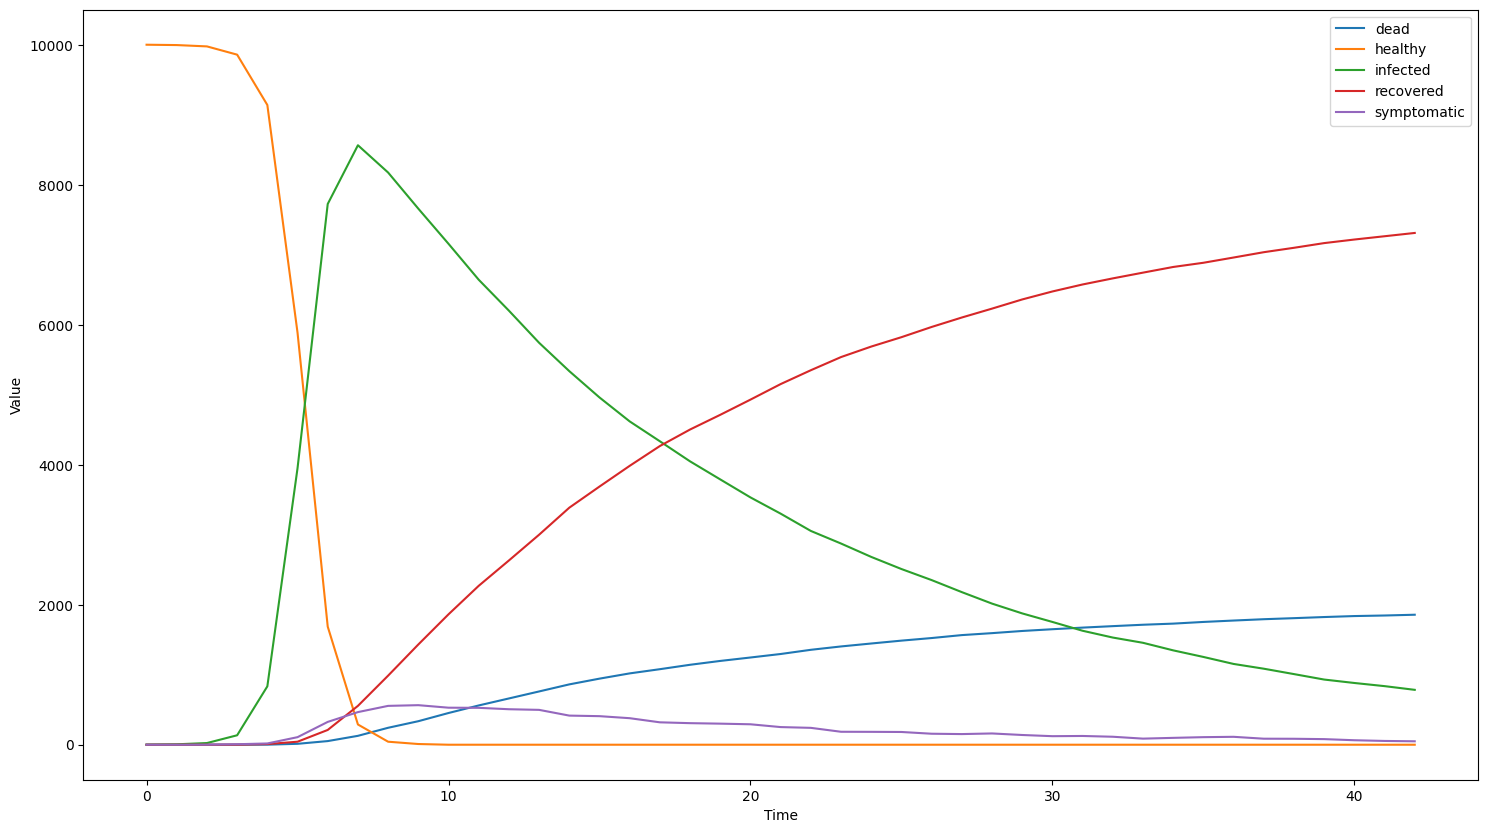

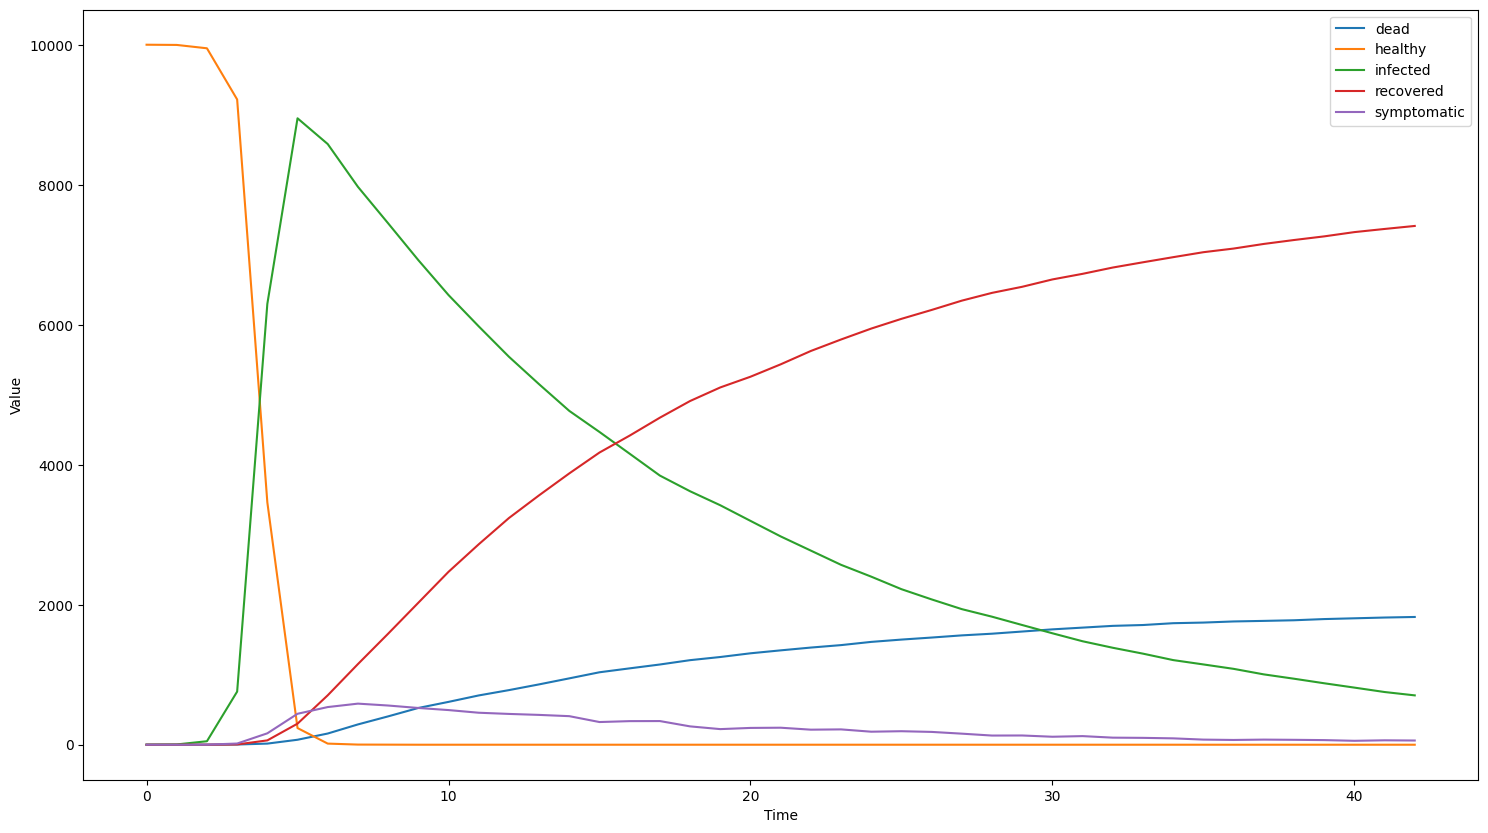

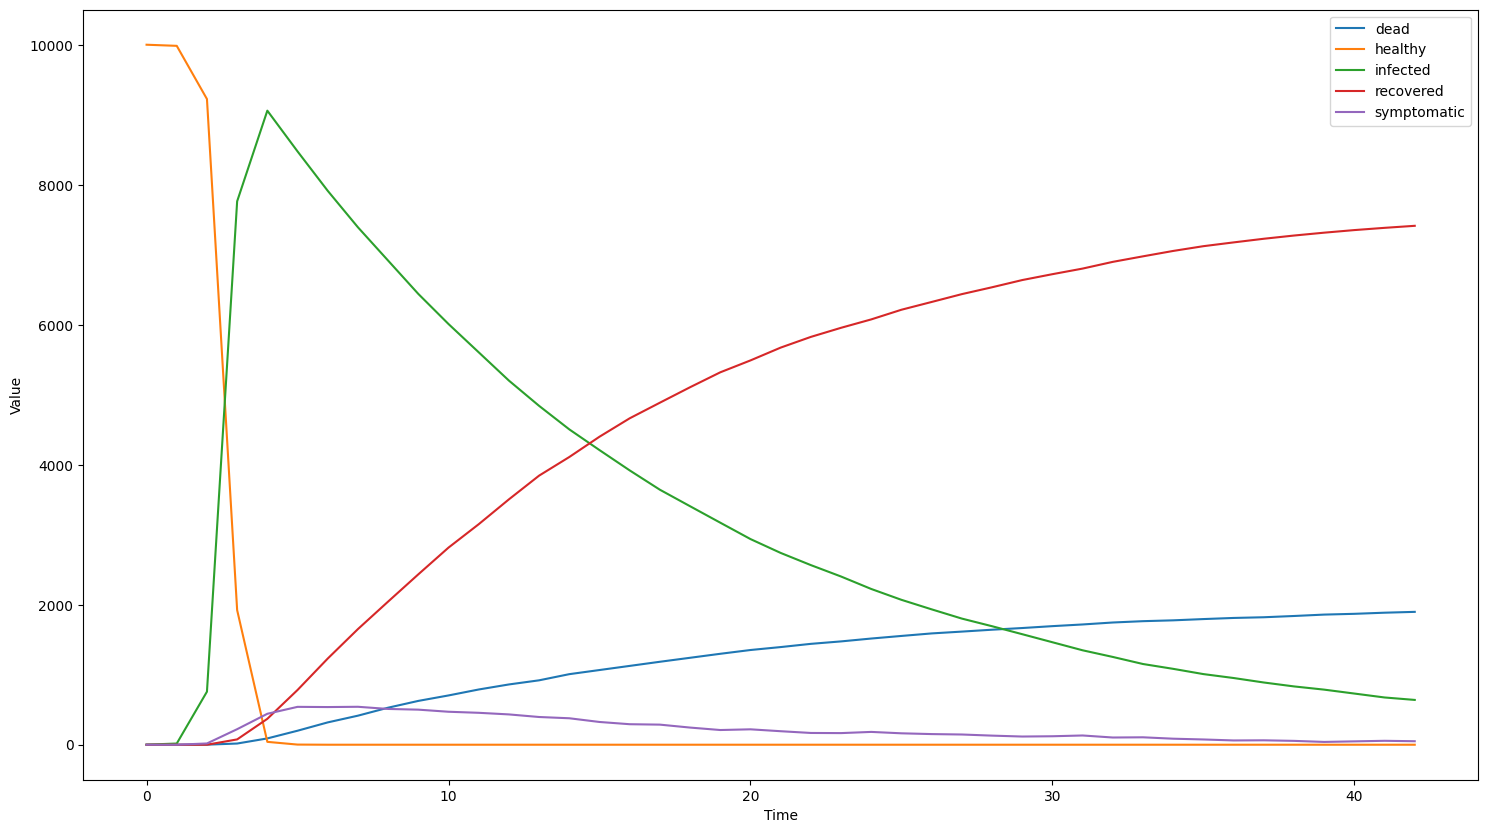

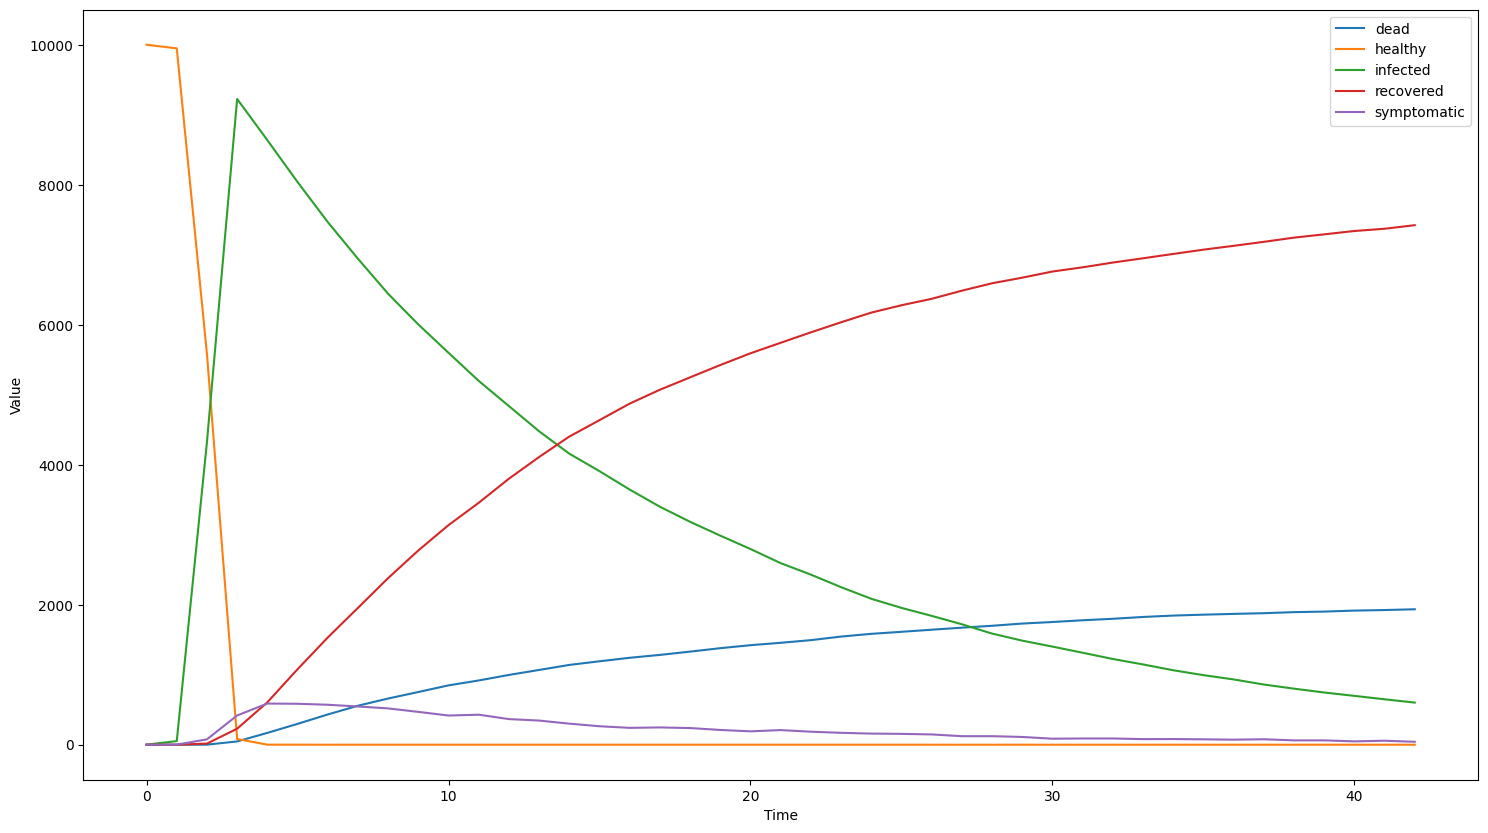

In [11]:
for vp_result in vp_results:
    vp_result.plot()

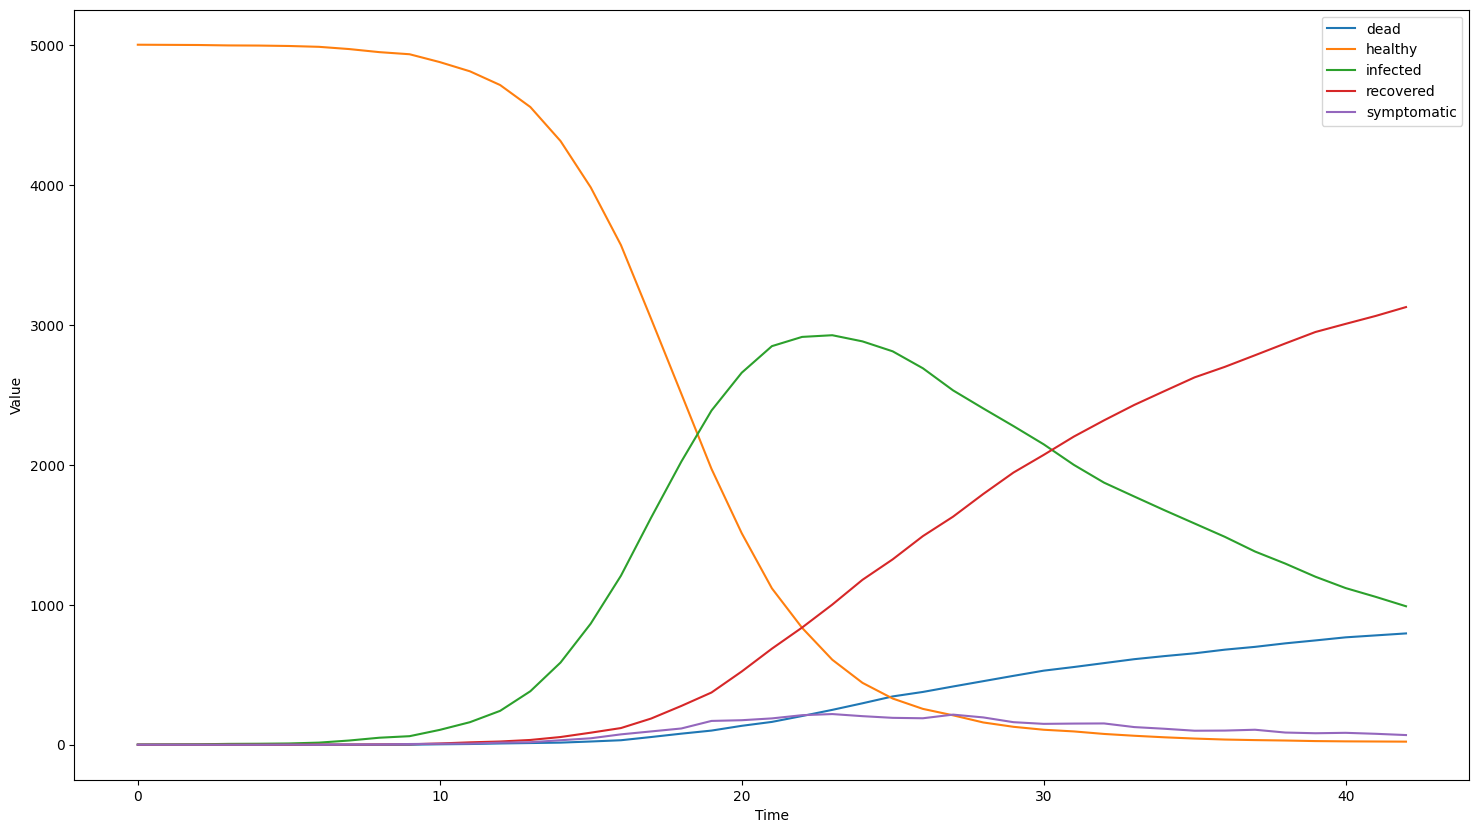

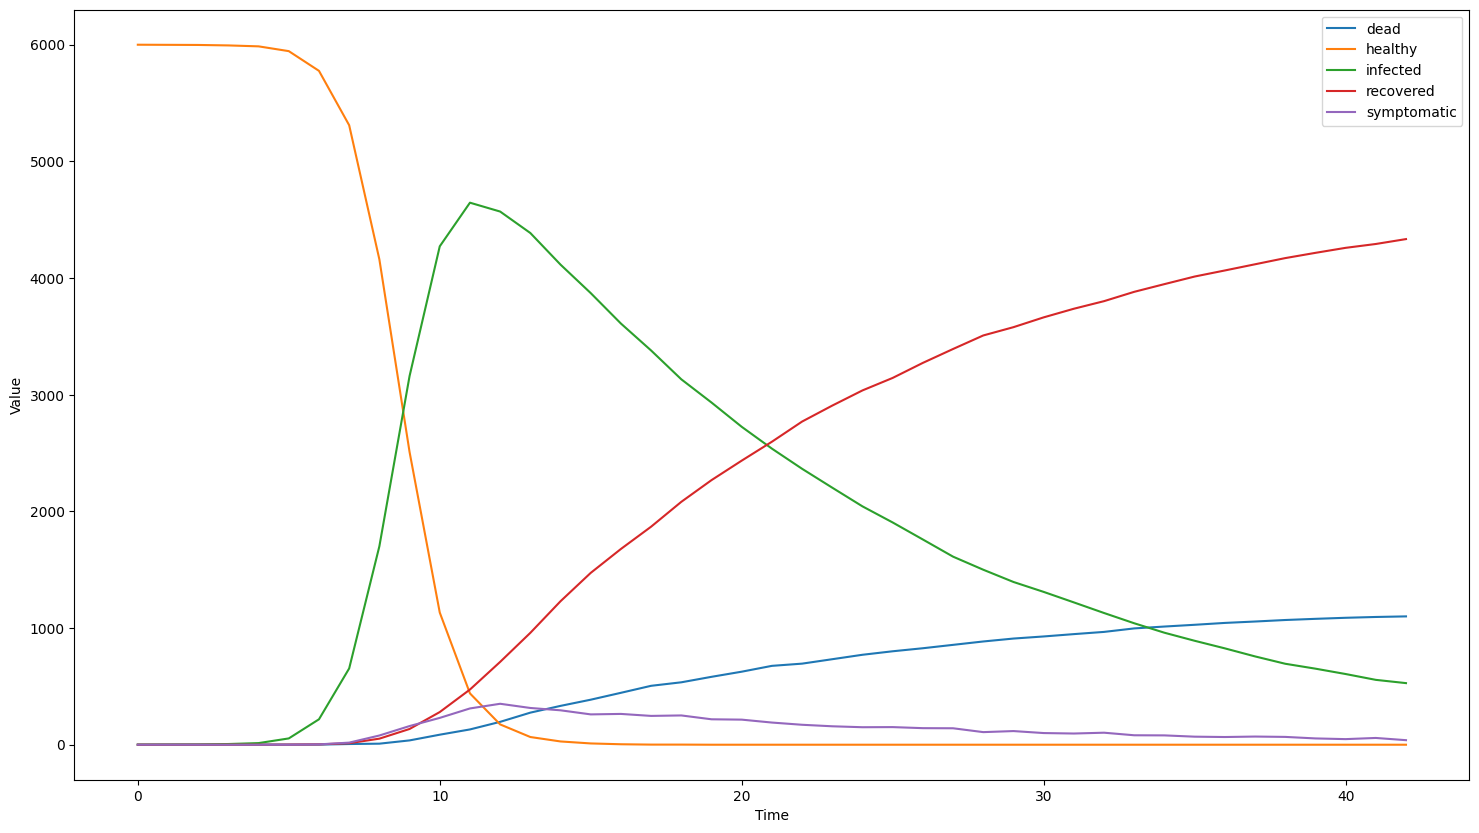

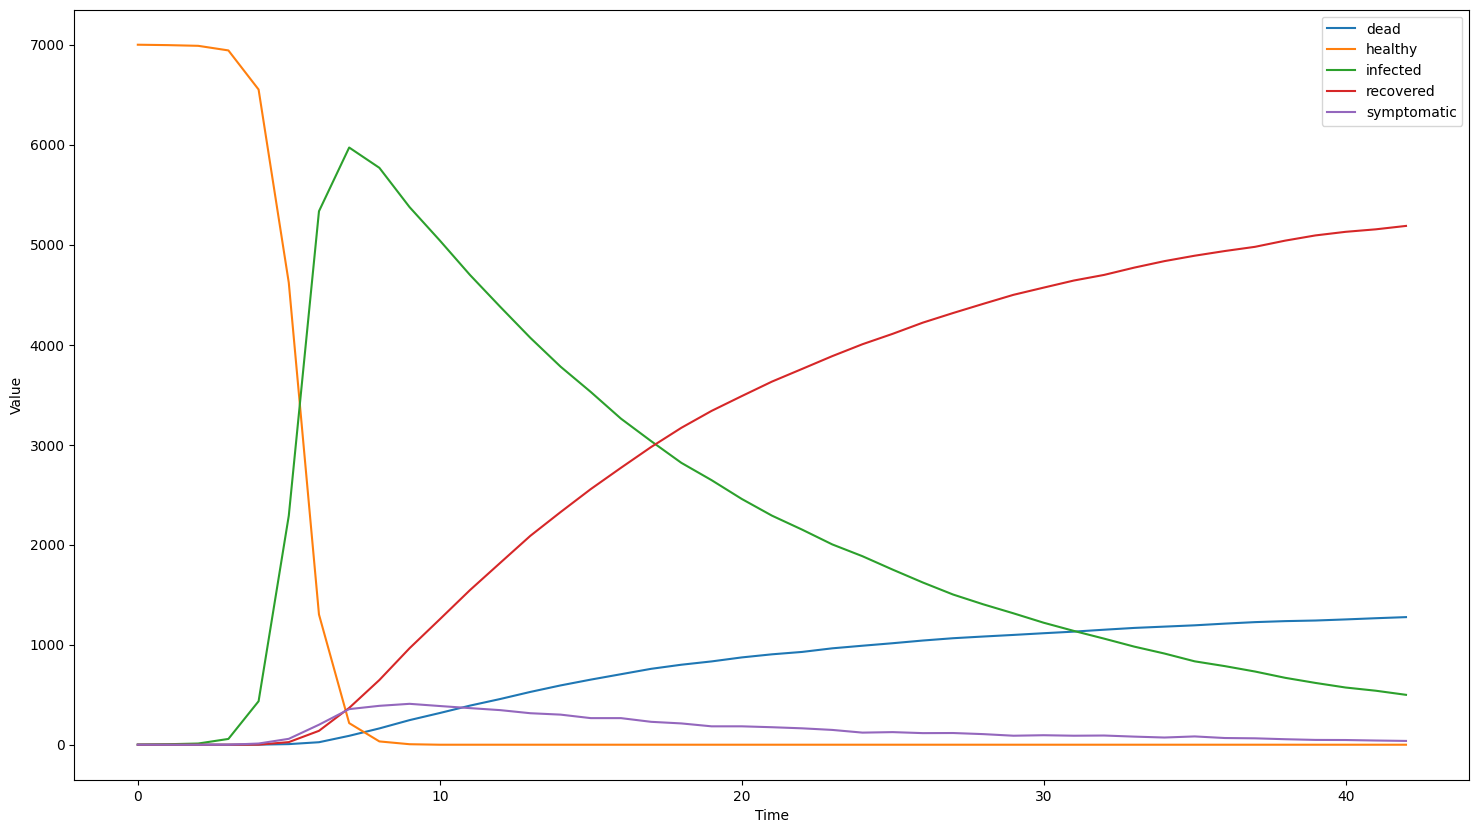

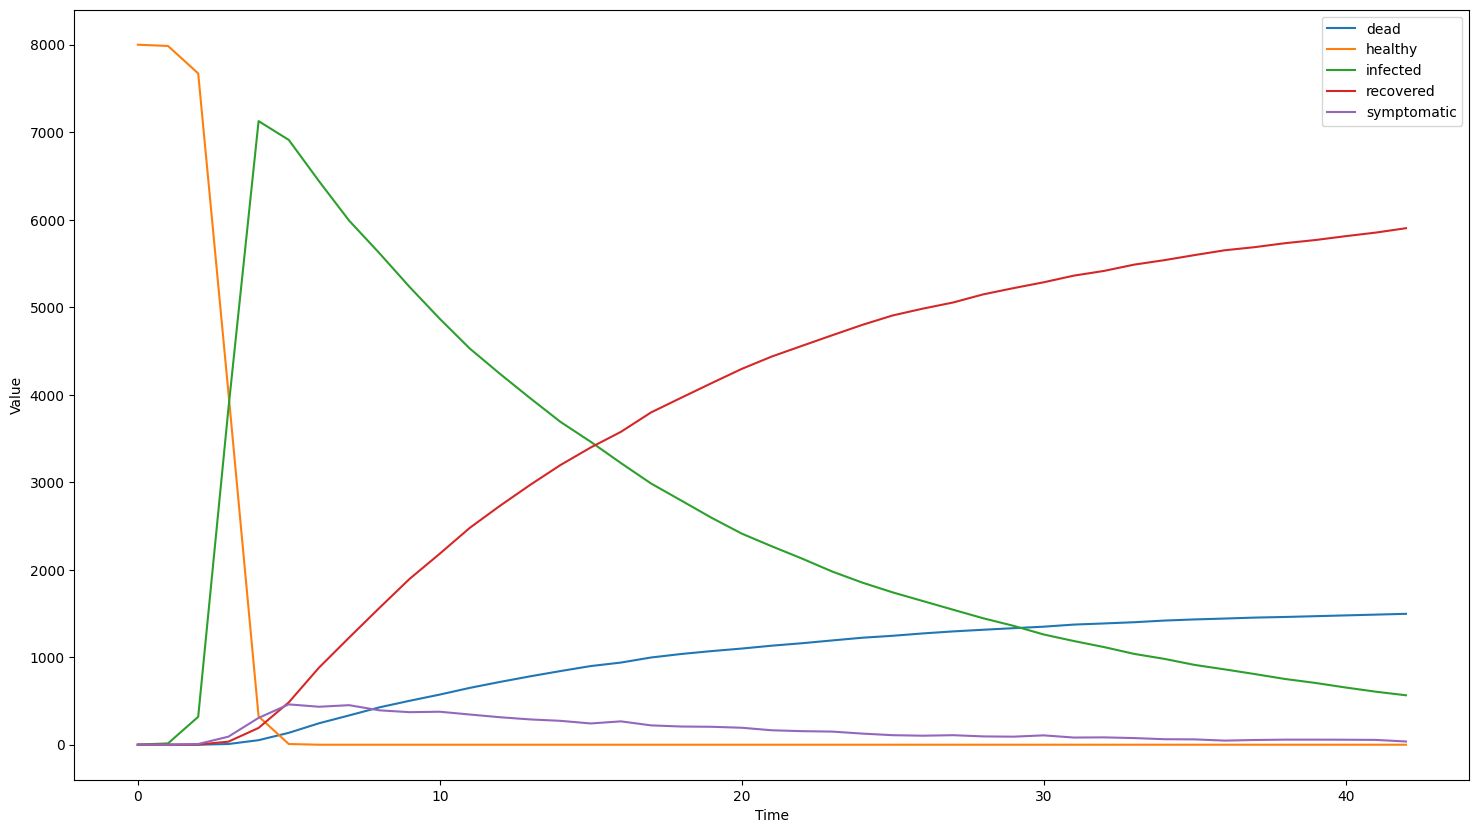

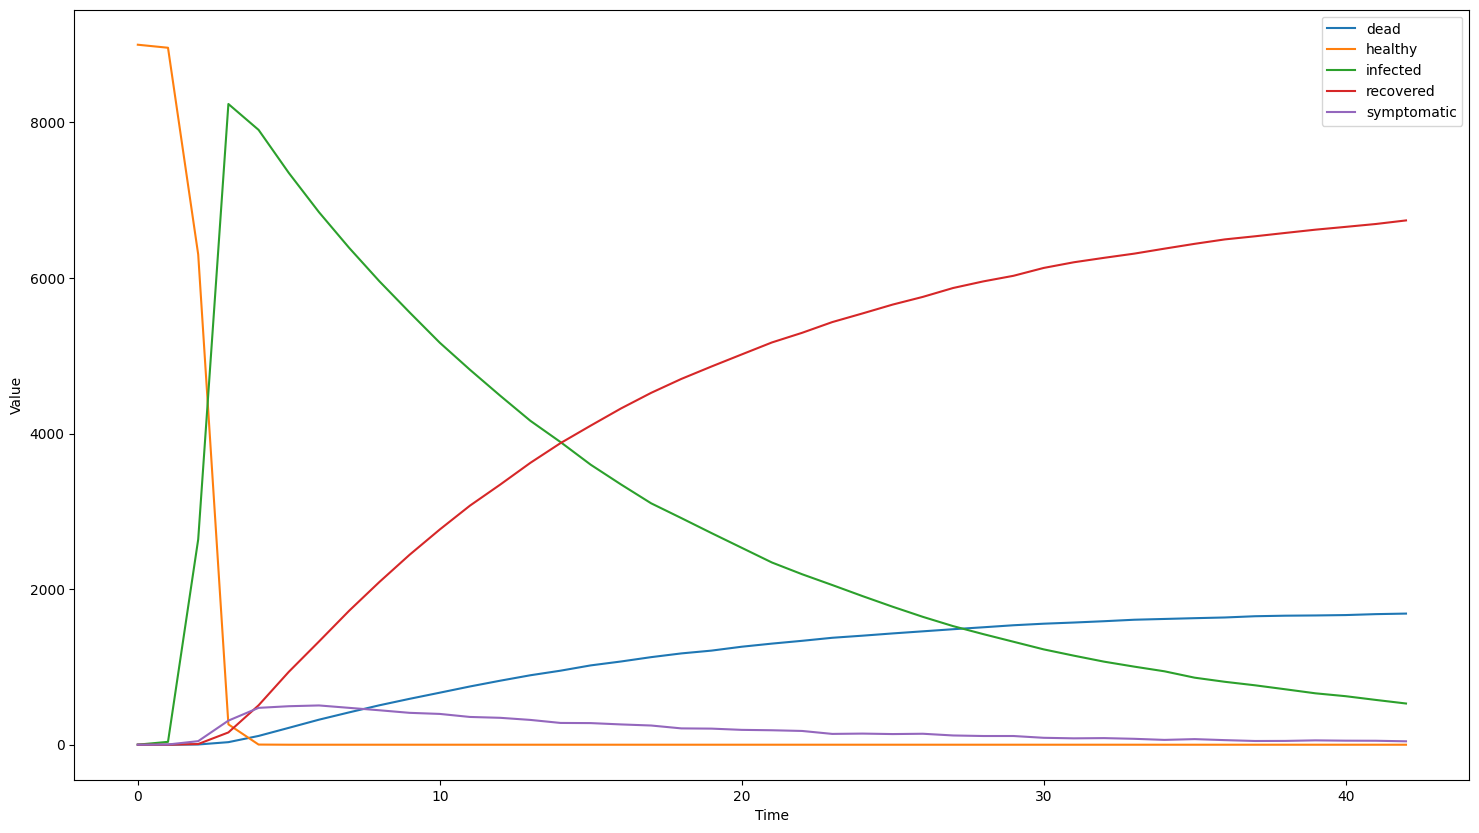

In [12]:
for vsp_result in vsp_results:
    vsp_result.plot()